<a href="https://colab.research.google.com/github/dragontea72/ML-ZoomCamp-Assignment/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset
In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able link:

`wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv`

The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

#Preparation
- Create the target variable by mapping yes to 1 and no to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with `random_state=1`.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [66]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv'

In [67]:
!wget $data -O credit_card.csv

--2022-10-04 11:10:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73250 (72K) [text/plain]
Saving to: ‘credit_card.csv’

credit_card.csv     100%[===================>]  71.53K  --.-KB/s    in 0.01s   

2022-10-04 11:10:35 (5.70 MB/s) - ‘credit_card.csv’ saved [73250/73250]



In [68]:
data = pd.read_csv('credit_card.csv')
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [69]:
data.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [71]:
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [72]:
data['card'] = data['card'].map({'yes':1, 'no': 0})

In [73]:
data.head(3)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.50,0.004156,15.000000,yes,no,4,58,1,5


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']

In [77]:
len(df_train), len(df_test), len(df_val)

(791, 264, 264)

## Question 1
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the card variable.
- Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenditure'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

In [78]:
data.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [79]:
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 
        'dependents', 'months', 'majorcards', 'active']

categorical = ['owner','selfemp',]

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [81]:
for c in numerical:
  auc = roc_auc_score(y_train, df_train[c]) 

  if auc < 0.5:
    auc = roc_auc_score(y_train, -df_train[c])
  print('%9s, %.3f' %(c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


# Q1 Answer : share

Training the model
From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

## Question 2
What's the AUC of this model on the validation dataset? (round to 3 digits)

In [82]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [83]:
dv = DictVectorizer(sparse = False)

train_dict = df_train[numerical + categorical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [84]:
val_dict =  df_val[numerical + categorical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

In [85]:
round(roc_auc_score(y_val, y_pred), 3)

0.995

##Question 3
Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

In [86]:
thresholds = np.linspace(0.0, 1.0, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [87]:
def tpr_fpr_dataframe(y_val, y_pred):

  scores = []
  thresholds = np.linspace(0.0, 1.0, 101)

  for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))

  columns = ['threshold', 'tp', 'fp', 'tn', 'fn']

  df_scores = pd.DataFrame(scores, columns = columns)

  df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
  df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn']) 

  return df_scores

In [88]:
df_tpr_fpr = tpr_fpr_dataframe(y_val, y_pred)
df_tpr_fpr

,threshold,tp,fp,tn,fn,tpr,fpr
0,0.00,211,0,53,0,1.000000,0.000000
1,0.01,211,19,34,0,1.000000,0.358491
2,0.02,211,22,31,0,1.000000,0.415094
3,0.03,211,29,24,0,1.000000,0.547170
4,0.04,211,31,22,0,1.000000,0.584906
...,...,...,...,...,...,...,...
96,0.96,204,53,0,7,0.966825,1.000000
97,0.97,203,53,0,8,0.962085,1.000000
98,0.98,203,53,0,8,0.962085,1.000000
99,0.99,202,53,0,9,0.957346,1.000000


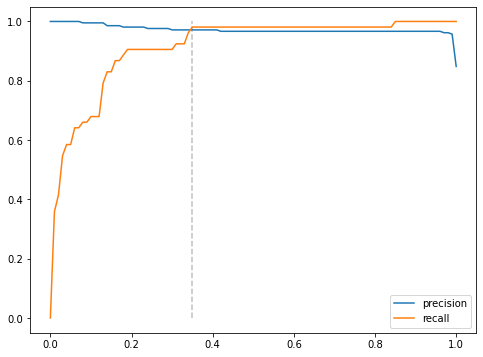

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(df_tpr_fpr.threshold , df_tpr_fpr.tpr, label = 'precision')
plt.plot(df_tpr_fpr.threshold, df_tpr_fpr.fpr, label = 'recall')

plt.vlines(0.35, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()


# Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing :

 

Where  is precision and  is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

In [90]:
df_tpr_fpr['f1'] = 2 * ((df_tpr_fpr.tpr * df_tpr_fpr.fpr) / (df_tpr_fpr.tpr + df_tpr_fpr.fpr))


In [91]:
df_tpr_fpr

,threshold,tp,fp,tn,fn,tpr,fpr,f1
0,0.00,211,0,53,0,1.000000,0.000000,0.000000
1,0.01,211,19,34,0,1.000000,0.358491,0.527778
2,0.02,211,22,31,0,1.000000,0.415094,0.586667
3,0.03,211,29,24,0,1.000000,0.547170,0.707317
4,0.04,211,31,22,0,1.000000,0.584906,0.738095
...,...,...,...,...,...,...,...,...
96,0.96,204,53,0,7,0.966825,1.000000,0.983133
97,0.97,203,53,0,8,0.962085,1.000000,0.980676
98,0.98,203,53,0,8,0.962085,1.000000,0.980676
99,0.99,202,53,0,9,0.957346,1.000000,0.978208


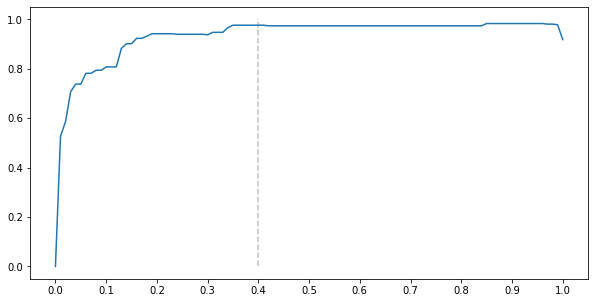

In [92]:
plt.figure(figsize = (10, 5))
plt.plot(df_tpr_fpr.threshold, df_tpr_fpr.f1)
plt.vlines(0.4, 0, 1.0, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

##Question 5
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
- Use AUC to evaluate the model on validation

How large is standard devidation of the AUC scores across different folds?

In [93]:
from sklearn.model_selection import KFold

In [94]:
def train(df_train, y_train, C = 1.0):
  dicts = df_train[categorical + numerical].to_dict(orient = 'records')

  dv = DictVectorizer(sparse = False)
  X_train = dv.fit_transform(dicts)

  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

In [96]:
def predict(df, dv, model):
  dicts = df[categorical + numerical].to_dict(orient = 'records')

  X = dv.transform(dicts)
  y_pred = model.predict_proba(X)[:, 1]

  return y_pred

In [98]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


##Question 6
Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: `[0.01, 0.1, 1, 10]`
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [99]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.995 +- 0.004
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003
